# Manufacturing Defects <hr style="border:2.5px solid #126782"></hr>

<b>Gyro A. Madrona</b><br>
Data Analyst

In [39]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [40]:
# load dataset
df = pd.read_csv(r"raw\defects-data.csv",
                 delimiter=',')
df

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
...,...,...,...,...,...,...,...,...
995,996,25,Structural,3/1/2024,Component,Minor,Automated Testing,813.14
996,997,23,Functional,3/21/2024,Component,Moderate,Automated Testing,944.07
997,998,17,Structural,1/16/2024,Component,Minor,Automated Testing,401.12
998,999,96,Cosmetic,6/21/2024,Internal,Moderate,Manual Testing,775.63


In [41]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [42]:
# summary of statistics
df.describe()

,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


## Categorical Data

In [43]:
# type or category of the defect
df['defect_type'].unique()

array(['Structural', 'Functional', 'Cosmetic'], dtype=object)

In [44]:
# location where the defect was found
df['defect_location'].unique()

array(['Component', 'Internal', 'Surface'], dtype=object)

In [45]:
# severity level of the defect
df['severity'].unique()

array(['Minor', 'Critical', 'Moderate'], dtype=object)

In [46]:
# method used to detect the defect
df['inspection_method'].unique()

array(['Visual Inspection', 'Automated Testing', 'Manual Testing'],
      dtype=object)

In [47]:
# checking for NAN values
df['repair_cost'].isna().sum()

np.int64(0)

## Graphs

In [48]:
plt.rcParams['font.family'] = 'Courier New' # runtime config

### Defect Type

In [49]:
# dataframe of defect type counts
df_dtype = df['defect_type'].value_counts().reset_index()
df_dtype

,defect_type,count
0,Structural,352
1,Functional,339
2,Cosmetic,309


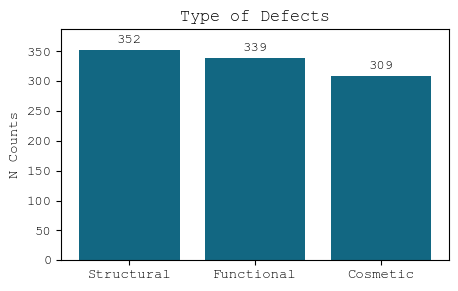

In [50]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(df_dtype['defect_type'],df_dtype['count'],
        color='#126782')
plt.title('Type of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=df_dtype['count'],
              padding=3)
plt.margins(y=0.1) # 10% margin
plt.show()

### Defect Location

In [51]:
# dataframe of defect location counts
df_dloc = df['defect_location'].value_counts().reset_index()
df_dloc

,defect_location,count
0,Surface,353
1,Component,326
2,Internal,321


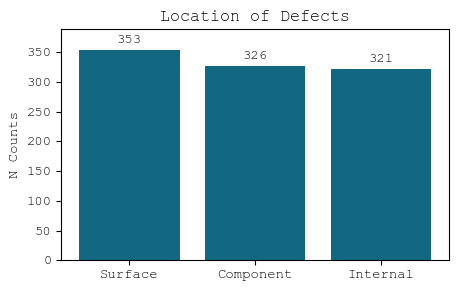

In [52]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(df_dloc['defect_location'],df_dloc['count'],
               color='#126782')
plt.title('Location of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=df_dloc['count'],
              padding=3)
plt.margins(y=0.1)
plt.show()

### Severity

In [53]:
# dataframe of defect severity
df_severity = df['severity'].value_counts().reset_index()
df_severity

,severity,count
0,Minor,358
1,Critical,333
2,Moderate,309


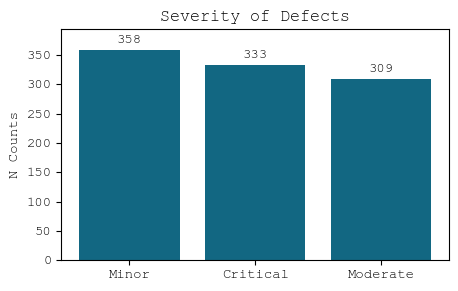

In [54]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(df_severity['severity'],df_severity['count'],
        color='#126782')
plt.title('Severity of Defects')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars,labels=df_severity['count']
              ,padding=3)
plt.margins(y=0.1)
plt.show()

### Inspection Method

In [79]:
# dataframe for inspection methods
df_inspection = df['inspection_method'].value_counts().reset_index()
df_inspection

,inspection_method,count
0,Manual Testing,352
1,Visual Inspection,351
2,Automated Testing,297


In [85]:
# rename categories
df_inspection['inspection_method'] = df_inspection['inspection_method'].replace({
    'Manual Testing':'Manual',
    'Visual Inspection':'Visual',
    'Automated Testing':'Automated'
})
df_inspection

,inspection_method,count
0,Manual,352
1,Visual,351
2,Automated,297


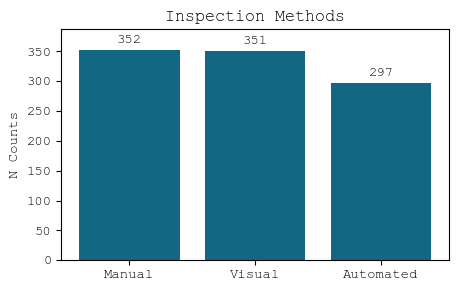

In [89]:
# bar graph
plt.figure(figsize=(5,3))
bars = plt.bar(df_inspection['inspection_method'],df_inspection['count'],
               color='#126782')
plt.title('Inspection Methods')
plt.ylabel('N Counts')

# bar labels
plt.bar_label(bars, labels=df_inspection['count'],
              padding=3)
plt.margins(y=0.1)
plt.show()